# Predicción de compuerta XOR con Red Neuronal

#### Se resolverá  el problema utilizando 3 neuronas.

#### Se Implementará SGD (Stochastic Gradient Descent) para resolver la XOR. 
 
#### Se entrenará la red con 100 epochs y distintos learning rates en un comienzo, posteriormente se modificarán las epochs y se graficarán los distintos MSE (Mean Squared Error) vs epochs, y finalmente se predecirán resultados.

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
class XorNNet:
    def initializeParameters(self, n_features, n_hidden, n_outputs):
        W1 = np.random.rand(n_hidden, n_features)
        W2 = np.random.rand(n_outputs, n_hidden)
        b1 = np.zeros((n_hidden, 1))
        b2 = np.zeros((n_outputs, 1))
        self.params = (W1, W2, b1, b2)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, Y, n_epochs, learning_rate):
        self.initializeParameters(2, 2, 1)

        mse = []
        n = X.shape[0]
        # cost_mean = 0
        for _ in range(n_epochs):
            for i in range(n):
                self.forward(X[i].reshape(1, -1), Y[:, i])
                self.backPropagation(X[i].reshape(1, -1), Y[:, i], learning_rate)   
            mse.append(self.cost[0][0])
        return mse

    def forward(self, x, y):
        W1, W2, b1, b2 = self.params
        Z1 = W1 @ x.T + b1
        A1 = self.sigmoid(Z1)
        Z2 = W2 @ A1 + b2

        self.cache = (Z1, A1, Z2)
        self.cost = 0.25*(y - Z2) ** 2

    def backPropagation(self, x, y, learning_rate):
        W1, W2, b1, b2 = self.params
        Z1, A1, Z2 = self.cache

        dZ2 = -2 * (y - Z2)
        dW2 = dZ2 @ A1.T
        db2 = dZ2

        dA1 = W2.T @ dZ2
        dZ1 = dA1 * (A1 * (1 - A1))
        dW1 = dZ1 @ x
        db1 = dZ1

        self.params = (
            W1 - learning_rate * dW1,
            W2 - learning_rate * dW2,
            b1 - learning_rate * db1,
            b2 - learning_rate * db2,
        )

    def predict(self, x):
        W1, W2, b1, b2 = self.params
        Z1 = W1 @ x.T + b1
        A1 = self.sigmoid(Z1)
        Z2 = W2 @ A1 + b2
        return Z2

El modelo tiene 9 parámetros que se desean conocer, a saber *w<sub>11</sub><sup>(1)</sup>*, *w<sub>12</sub><sup>(1)</sup>*, *b<sub>1</sub><sup>(1)</sup>* para la primera neurona de la primera capa, *w<sub>21</sub><sup>(1)</sup>*, *w<sub>22</sub><sup>(1)</sup>*, *b<sub>2</sub><sup>(1)</sup>* para la segunda neurona de la primera capa y *w<sub>1</sub><sup>(2)</sup>*, *w<sub>2</sub><sup>(2)</sup>*, *b<sup>(2)</sup>* para la neurona de la capa de salida.

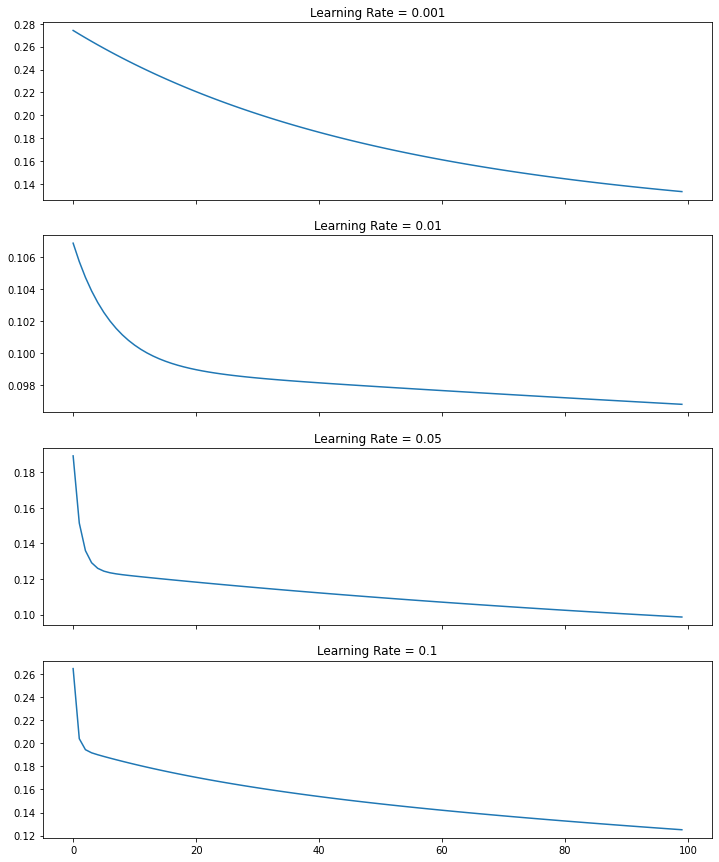

In [7]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0, 1, 1, 0]])
learning_rates = [0.001, 0.01, 0.05, 0.1]

figure, axis = plt.subplots(len(learning_rates), sharex=True, figsize=(12, 15))

for i, learning_rate in enumerate(learning_rates):
    mse = XorNNet().fit(X, Y, 100, learning_rate)  #n_epochs = 100
    axis[i].plot(mse)
    axis[i].set_title(f"Learning Rate = {learning_rate}")

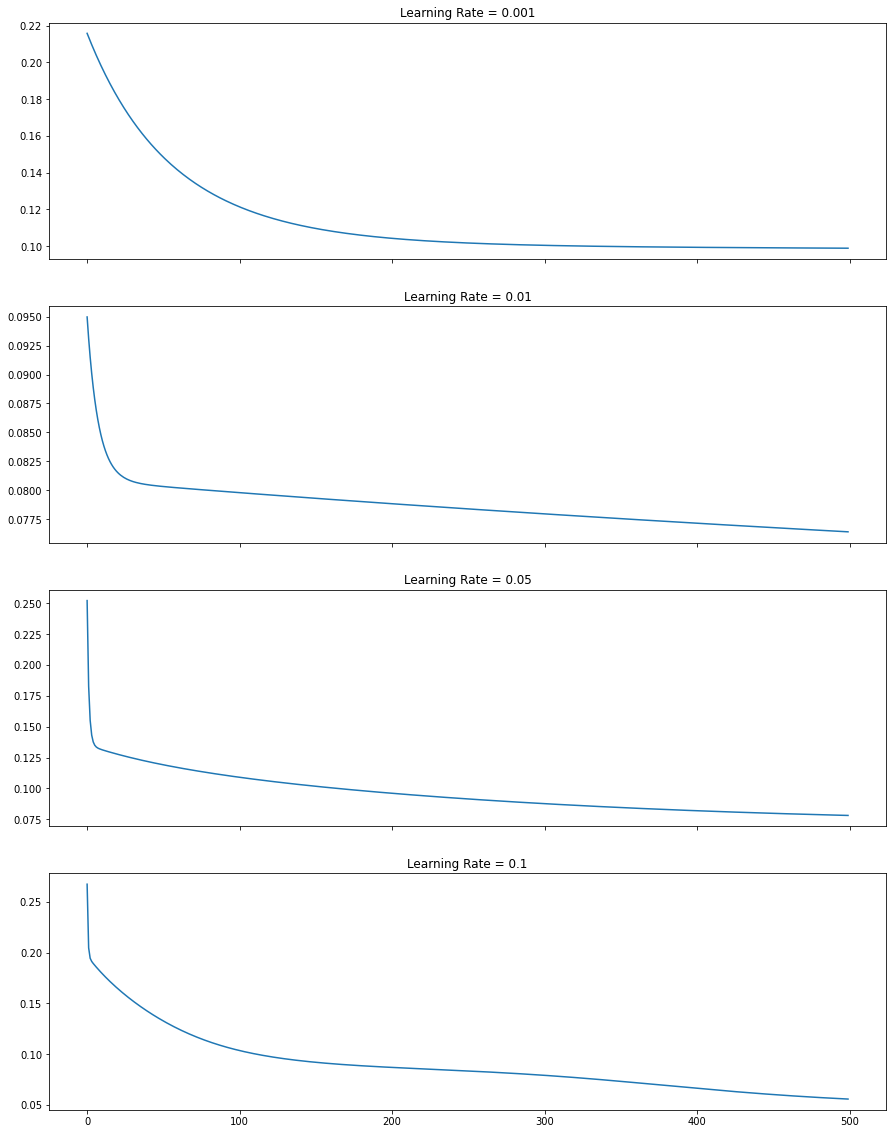

In [8]:
figure, axis = plt.subplots(len(learning_rates), sharex=True, figsize=(15, 20))

for i, learning_rate in enumerate(learning_rates):
    mse = XorNNet().fit(X, Y, 500, learning_rate)  #n_epochs = 500
    axis[i].plot(mse)
    axis[i].set_title(f"Learning Rate = {learning_rate}")

In [9]:
X_test = np.array([[0, 1], [1, 1], [1, 0], [0, 0]])
Y_test = np.array([[1, 0, 1, 0]])

xor_nn = XorNNet()
xor_nn.fit(X, Y, 500, 0.01)
predict = xor_nn.predict(X_test)
print(f"Predicción: {np.rint(predict).reshape(-1)}")
print(f"Salida de la compuerta lógica: {Y_test.reshape(-1)}")

Predicción: [1. 1. 0. 0.]
Salida de la compuerta lógica: [1 0 1 0]


### Conclusiones:
-El learning rate óptimo parece ser en ambos casos (con n_epochs 100 y 500) 0,05: El MSE se reduce mucho más rápidamente en las primeras épocas.
-La predicción de la red claramente no tiene buena performance. Para obtener una mejor predicción, se podría incrementar el número de capas, o bien agregar una función de activación en la segunda capa o en todo caso,  modificar la función de costo por (como se ve en muchos ejemplos de resolución de este "toy problem") un Binary Cross Entropy.